<h1><center>Ciência dos Dados - PROJETO 1</center></h1>
<h2><center>Gabriella Escobar Cukier</center></h2>


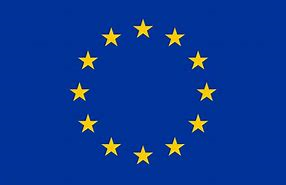

<h1><center>União Europeia</center></h1>




Considerado um dos mais importantes blocos econômicos do mundo, a União Europeia é formada por 28 países. Entre eles, há livre circulação de bens, mercadorias e pessoas e o uso de uma moeda única em diversos membros.



## Pergunta (s) a ser respondida
### Como a entrada na União Europeia afeta o desemprego em um país?

## Explicação da hipótese e mecanismo

Segundo o artigo "The EU Single Market: Impact on Member States", conduzido pela LE Europe, a União Europeia é um bloco econômico com um grande nível de integração. Isso traz consequências benéficas como melhorias econômicas e em índices internos da qualidade de vida de cada país.
É o caso da Polônia, como mostrado no artigo "POLAND IN THE EUROPEAN UNION. TEN YEARS OF MEMBERSHIP", da Universidade de Varsóvia. Ele estuda as consequências econômicas da entrada da Polônia na União Europeia.
Segundo o estudo, a entrada no bloco econômico causou um significativo aumento das exportações, devido ao acordo de livre circulação de mercadorias. Como consequência, a economia do pais melhorou.
Levando em conta tais transformações no cenário econômico, este trabalho visa estudar como a entrada de um país na União Europeia afeta seu nível de desemprego.
Também serão analisadas alguns fatores considerados relevantes pelo o primeiro artigo para a mudança deste indíce, dentre eles o crescimento do GDP , o nível de exportações e os investimentos internos em infraestrutura do país.

Referências dos artigos: http://www.amchameu.eu/sites/default/files/amcham_eu_single_market_web.pdf ; https://www.ucm.es/data/cont/media/www/pag-78913/UNISCIDP40-1Katarzyna%20K.pdf

## Bases de dados usadas

Os dados usados foram retirados do site GapMinder (https://www.gapminder.org/data/). Os seguintes índices serão estudados: IDH, GDP per capita, desemprego (pessoas com mais de 15 anos - porcentagem da população), exportações porcentagem do GDP), crescimento anual do GDP (porcentagem), investimentos internos (porcentagem do GDP).

## Análise de dados

Em primeiro lugar serão filtrados países que possuem um nível socioeconômico semelhante, pois acredita-se que este grupo possibilita uma comparação mais realista com os países que entraram na União Europeia em 2004. Para isso serão considerados o GDP per capita e o IDH. Depois, será estudada a evolução do índice de desemprego ao longo do tempo para os países que aderiram ao bloco e aqueles comparáveis. Por fim, será investigada a relação entre o desemprego e suas possíveis causas: crescimento do GDP, índice de exportações e de investimento interno, fatores atrelados à entrada no bloco econômico estudado.

In [831]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [832]:
# acesso aos dataframes
idh = pd.read_excel('idh.xlsx')
gdp= pd.read_excel('gdp_capta.xlsx')
unemployment=pd.read_excel('unemployment.xlsx')
investimento=pd.read_excel('inestimentos.xlsx')
dGDP=pd.read_excel('aumento_GDP.xlsx')
exportacao=pd.read_excel('exportacao.xlsx')

idh=idh.set_index('country')
gdp=gdp.set_index('country')
unemployment=unemployment.set_index('country')
investimento=investimento.set_index('country')
dGDP=dGDP.set_index('country')
exportacao=exportacao.set_index('country')

Para filtrar os países que fazem parte da União Europeia, foi usada uma variável qualitativa, em que 0 indica o não pertencimento e 1 o pertencimento ao bloco em questão

In [833]:
paises = pd.read_excel('paises_UE2.xlsx')
paises=paises.set_index('country')

## Escolha dos países a serem analisados

Oficialmente, a União Europeia foi fundada em 1992, mas sua formação fundamentou-se em um longo processo atrelado a acordos intergovernamentais anteriores.
O número de países membros foi aumentando ao longo dos anos. Em 2004 ocorreu a entrada no bloco com o maior número de membros. Por esse motivo, o ano em questão, assim como os países que participaram dessa adesão foram  selecionados como base para uma análise mais aprofundada das consequências da entrada no bloco.


Os países que entraram no ano de 2004 foram: Estónia, Letónia, Lituânia, Chipre, Malta, Polónia, República Checa, Hungria e Eslováquia e Eslovênia.

Para possibilitar a análise dos dados e comparação entre os países estudados, foram criadas duas variáveis qualitativas. A primeira, indicada na coluna 'EU' do dataframe, indica se os países pertencem à União Europeia (1) ou não (0). A outra, representada na coluna "selecao" mostra os países que entraram no bloco em 2004 (1) e aqueles que não (0).

In [834]:
eur2004=['Cyprus','Czech Republic','Estonia','Hungary','Latvia','Lithuania','Malta','Poland','Slovak Republic','Slovenia']
eur=[('Austria'),('Belgium'),('Bulgaria'),('Croatia'),('Cyprus'),('Czech Republic'),('Denmark'), ('Estonia'),('Finland'),('France'),('Germany'),('Greece'),('Hungary'),('Ireland'),('Italy'),('Latvia'),('Lithuania'),('Luxembourg'),('Malta'),('Netherlands'),('Poland'),('Portugal'),('Romania'),('Slovak Republic'),('Slovenia'),('Spain'),('Sweden'),('United Kingdom')]

paises["EU"]=0

paises.loc[eur,"EU"]=1


In [835]:
paises['selecao']=0
paises.loc[eur2004,"selecao"]=1
paises.head(4)

,EU,selecao
country,,
Afghanistan,0,0
Albania,0,0
Algeria,0,0
Andorra,0,0


O objetivo do projeto é estudar o efeito da entrada no bloco econômico em questão. Assim, é importante comparar os dados com aqueles de outros países. Para uma melhor comparação, serão escolhidos países não pertencentes ao bloco que possuem um nível socioeconômico semelhante. Para isso, será levado em conta o IDH e GDP per capita.

In [836]:
paises_gdp=gdp.loc[:,[(2015)]]
paises_gdp = paises_gdp.rename(columns = {2015:'GDP_2015'})

In [837]:
paises_idh=idh.loc[:,[(2015)]]
paises_idh = paises_idh.rename(columns = {2015:'IDH_2015'})


Para facilitar a comparação destas variáveis qualitativas de diferentes países, foram estabelecidas 20 faixas de valores

In [838]:
faixas_idh = pd.cut(paises_idh['IDH_2015'], bins=20)
faixas_gdp=  pd.cut(paises_gdp['GDP_2015'], bins=20)
faixas_idh.head()

country
Afghanistan    (0.471, 0.501]
Albania          (0.74, 0.77]
Algeria          (0.74, 0.77]
Andorra         (0.83, 0.859]
Angola         (0.531, 0.561]
Name: IDH_2015, dtype: category
Categories (20, interval[float64]): [(0.351, 0.382] < (0.382, 0.412] < (0.412, 0.442] < (0.442, 0.471] ... (0.83, 0.859] < (0.859, 0.889] < (0.889, 0.919] < (0.919, 0.949]]

Os dados foram colocados em um mesmo dataframe, por meio do comando "join"

In [839]:
df = paises.join(paises_gdp, how='inner', lsuffix=' ', rsuffix=' ')

In [840]:
data = df.join(paises_idh, how="inner")

In [841]:
dataf = data.join(faixas_idh, how="inner", lsuffix='', rsuffix='_faixas')

In [842]:
dfaixas = dataf.join(faixas_gdp, how="inner", lsuffix='', rsuffix='_faixas')
dfaixas.head(4)

,EU,selecao,GDP_2015,IDH_2015,IDH_2015_faixas,GDP_2015_faixas
country,,,,,,
Afghanistan,0,0,1750,0.479,"(0.471, 0.501]","(503.623, 6591.85]"
Albania,0,0,11000,0.764,"(0.74, 0.77]","(6591.85, 12560.7]"
Algeria,0,0,13700,0.745,"(0.74, 0.77]","(12560.7, 18529.55]"
Andorra,0,0,46600,0.858,"(0.83, 0.859]","(42404.95, 48373.8]"


Foram filtrados os países pertencentes à União Europeia e aqueles externos ao bloco, para possibilitar uma comparação

In [843]:
europeus=dfaixas[dfaixas['EU']==1]
europeus.head(3)

,EU,selecao,GDP_2015,IDH_2015,IDH_2015_faixas,GDP_2015_faixas
country,,,,,,
Austria,1,0,44100,0.893,"(0.889, 0.919]","(42404.95, 48373.8]"
Belgium,1,0,41700,0.896,"(0.889, 0.919]","(36436.1, 42404.95]"
Bulgaria,1,0,17000,0.794,"(0.77, 0.8]","(12560.7, 18529.55]"


In [844]:
naoEuropeus=dfaixas[dfaixas['EU']==0]
naoEuropeus.head(3)

,EU,selecao,GDP_2015,IDH_2015,IDH_2015_faixas,GDP_2015_faixas
country,,,,,,
Afghanistan,0,0,1750,0.479,"(0.471, 0.501]","(503.623, 6591.85]"
Albania,0,0,11000,0.764,"(0.74, 0.77]","(6591.85, 12560.7]"
Algeria,0,0,13700,0.745,"(0.74, 0.77]","(12560.7, 18529.55]"


Para obter conclusões mais fidedignas, foi pensado em estabelecer uma comparação com países com  IDH e PIB per capta em faixas semelhantes dos países da União Europeia. Para isso, visava-se selecionar as faixas com um maior número de países da União Europeia. Depois, os mesmos valores dessas faixas selecionadas seriam aplicados para filtrar outros países, que teriam indicadores semelhantes

Text(0, 0.5, 'Quantidade de países')

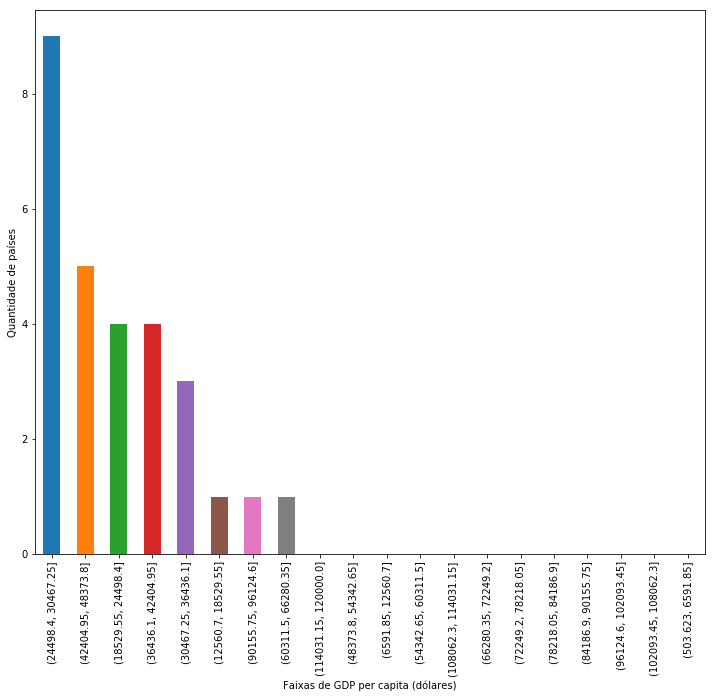

In [845]:
numeurgdp=europeus['GDP_2015_faixas'].value_counts()
fig=plt.figure(figsize=(12,10))
numeurgdp.plot(kind='bar',  legend=False)
plt.xlabel('Faixas de GDP per capita (dólares)')
plt.ylabel('Quantidade de países')


O gráfico mostra que uma grande concentração dos países da União Europeia possui o valor de GDP per capita concentrada na faixa entre 24448 e 30467 dólares.

Text(0, 0.5, 'Quantidade de países')

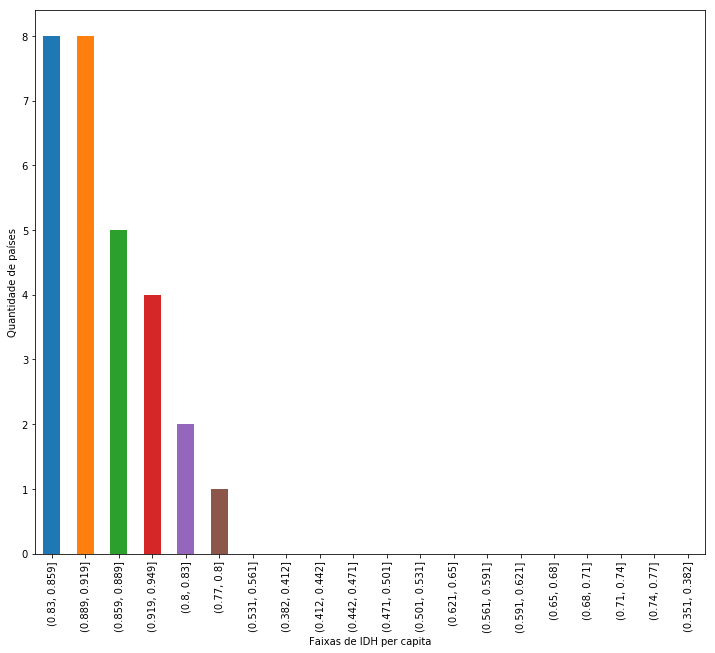

In [846]:
numeuridh=europeus['IDH_2015_faixas'].value_counts()
fig=plt.figure(figsize=(12,10))
numeuridh.plot(kind='bar',  legend=False)
plt.xlabel('Faixas de IDH per capita')
plt.ylabel('Quantidade de países')


O gráfico mostra que uma grande concentração dos países da União Europeia possui o valor de IDH concentrado na faixas 0.83 a 0.859 e 0.889 a 0.919.

Para a comparação com outros países, foram escolhidas as faixas  de valores que continham mais países da União Europeia

In [847]:
comparacao = naoEuropeus[((naoEuropeus['IDH_2015']>0.83)) & ((naoEuropeus['GDP_2015']>24498))]
comparacao

,EU,selecao,GDP_2015,IDH_2015,IDH_2015_faixas,GDP_2015_faixas
country,,,,,,
Andorra,0,0,46600,0.858,"(0.83, 0.859]","(42404.95, 48373.8]"
Australia,0,0,43800,0.939,"(0.919, 0.949]","(42404.95, 48373.8]"
Brunei,0,0,74600,0.865,"(0.859, 0.889]","(72249.2, 78218.05]"
Canada,0,0,43000,0.920,"(0.919, 0.949]","(42404.95, 48373.8]"
Iceland,0,0,42700,0.921,"(0.919, 0.949]","(42404.95, 48373.8]"
Israel,0,0,32000,0.899,"(0.889, 0.919]","(30467.25, 36436.1]"
Japan,0,0,37800,0.903,"(0.889, 0.919]","(36436.1, 42404.95]"
New Zealand,0,0,34600,0.915,"(0.889, 0.919]","(30467.25, 36436.1]"
Norway,0,0,63700,0.949,"(0.919, 0.949]","(60311.5, 66280.35]"


Uma variável qualitativa foi acrescentada para selecionar os países filtrados acima. O número 0 indica aqueles países que a análise não levará em conta. 1 representa os que aderiram a União Europeia em 2004. 2 refere-se aos países que serão comparados no estudo

In [848]:
comp=['Andorra','Australia', 'Brunei','Canada','Iceland','Israel','Japan', 'New Zealand', 'Norway', 'Qatar','Saudi Arabia','Singapore','South Korea', 'Switzerland', 'United Arab Emirates', 'United States']

paises.loc[comp,"selecao"]=2
paises.head(10)

,EU,selecao
country,,
Afghanistan,0,0
Albania,0,0
Algeria,0,0
Andorra,0,2
Angola,0,0
Antigua and Barbuda,0,0
Argentina,0,0
Armenia,0,0
Australia,0,2


# Análise temporal

### Seleção dos dados

A entrada dos países analisados no bloco ocorreu em 2004. Foi escolhido o período entre 2000 e 2008 para a análise, considerando que nesse intervalo de tempo seria possível obter uma perspectiva dos índices antes da aderência ao bloco e a mudança nos anos que sucederam a entrada.

### Índices de desemprego

In [849]:
unemp = unemployment.loc[:,[(2000),(2002),(2004),(2006),(2008)]]
unemp.head()

,2000,2002,2004,2006,2008
country,,,,,
Afghanistan,NaN,NaN,NaN,NaN,2.49
Albania,NaN,NaN,NaN,NaN,13.10
Algeria,29.8,25.9,17.6,12.3,11.30
Angola,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN


In [850]:
analisePaises=paises.join(unemp, lsuffix='', rsuffix='')
analisePaises.tail()

,EU,selecao,2000,2002,2004,2006,2008
country,,,,,,,
Venezuela,0,0,NaN,16.20,NaN,8.61,6.25
Vietnam,0,0,2.26,2.12,2.14,NaN,2.38
Yemen,0,0,NaN,NaN,NaN,NaN,NaN
Zambia,0,0,NaN,NaN,NaN,NaN,7.93
Zimbabwe,0,0,NaN,NaN,4.39,NaN,NaN


Após o dataframe com os dados de cada ano ser montado, os grupos de países a serem analisados foram separados e salvos.

In [879]:
analiseUE=analisePaises[analisePaises['selecao']==1]
analiseUE.head()

,EU,selecao,2000,2002,2004,2006,2008
country,,,,,,,
Cyprus,1,1,4.97,3.30,4.33,4.54,3.65
Czech Republic,1,1,8.76,7.02,8.21,7.15,4.39
Estonia,1,1,13.40,10.00,10.20,5.91,5.45
Hungary,1,1,6.56,5.61,5.83,7.49,7.82
Latvia,1,1,14.20,13.80,11.70,7.03,7.74


In [852]:
analiseOutros=analisePaises[analisePaises['selecao']==2]
analiseOutros.head()

,EU,selecao,2000,2002,2004,2006,2008
country,,,,,,,
Andorra,0,2,NaN,NaN,NaN,NaN,NaN
Australia,0,2,6.28,6.37,5.39,4.78,4.23
Brunei,0,2,NaN,NaN,NaN,NaN,NaN
Canada,0,2,6.83,7.66,7.19,6.32,6.14
Iceland,0,2,1.94,2.99,4.03,2.83,2.95


É possível observar nos dados das tabelas que alguns países fora da União Europeia, não possuem dados suficientes referentes para análise à evolução do desemprego.
Por conta disso, optou-se por retirá-los da análise.


In [853]:
analiseOutros=analiseOutros.drop(('Andorra'))
analiseOutros=analiseOutros.drop(('Brunei'))
analiseOutros=analiseOutros.drop(('Qatar'))
analiseOutros=analiseOutros.drop(('Iceland'))
analiseOutros=analiseOutros.drop(('United Arab Emirates'))
analiseOutros

,EU,selecao,2000,2002,2004,2006,2008
country,,,,,,,
Australia,0,2,6.28,6.37,5.39,4.78,4.23
Canada,0,2,6.83,7.66,7.19,6.32,6.14
Israel,0,2,11.10,12.90,13.00,10.70,7.70
Japan,0,2,4.70,5.40,4.70,4.10,4.00
New Zealand,0,2,6.13,5.28,4.00,3.86,4.17
Norway,0,2,3.46,4.02,4.26,3.40,2.55
Saudi Arabia,0,2,4.57,5.27,5.82,6.25,5.08
Singapore,0,2,3.70,5.65,5.84,4.48,3.96
South Korea,0,2,4.40,3.30,3.70,3.50,3.20


In [854]:
outrosEU=analisePaises[(analisePaises['selecao']==0) & (analisePaises['EU']==1)]
outrosEU.head(3)

,EU,selecao,2000,2002,2004,2006,2008
country,,,,,,,
Austria,1,0,4.69,4.85,5.83,5.24,4.13
Belgium,1,0,6.59,6.91,7.36,8.25,6.98
Bulgaria,1,0,16.20,18.10,12.00,8.95,5.61


In [878]:
faixa=range(2,18,2)

eu2000= pd.cut(analiseUE[2000], faixa, False)
ue1=(eu2000.value_counts(True)*100).round(decimals=1)

## Gráficos e análise dos resultados

### Perspectiva geral ao longo do tempo

Para essa análise, foram plotados histogramas. Os da esquerda (em verde) referem-se aos países que entraram na União Europeia em 2004. Os da direita (em roxo) indicam os países comparáveis selecionados. Eles fornecem uma perspectiva de médias, medianas e modas, possibilitando uma análise da distribuição dos dados.

### Desemprego em 2000

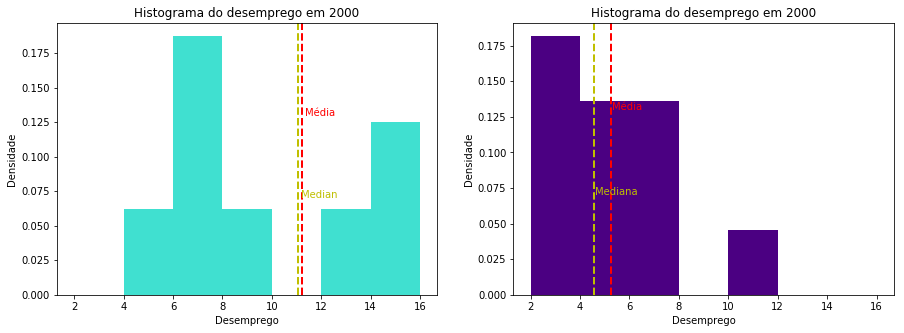

In [866]:
def verticalLine(plot, x, y, color, nome):
    plot.axvline(x, color=color, linestyle="dashed", linewidth=2)
    plot.text(1.01*x, y, nome, color=color)    

  

faixa=range(2,18,2)

eu2000= pd.cut(analiseUE[2000], faixa, False)
ue1=(eu2000.value_counts(True)*100).round(decimals=1)
eu2000.value_counts()

fig=plt.figure(figsize=(15,5))
plt.subplot(121)
plot=analiseUE[2000].plot.hist(color='turquoise',bins=faixa, density=True)
plt.xlabel('Desemprego')
plt.ylabel('Densidade')
plt.title(('Histograma do desemprego em 2000'))
verticalLine(plot, analiseUE[2000].mean(), .13, "r", "Média")
verticalLine(plot, analiseUE[2000].median(), .07, "Y", "Median")

plt.subplot(122)
plot2=analiseOutros[2000].plot.hist(color=('indigo'),bins=faixa, density=True)
plt.xlabel('Desemprego')
plt.ylabel('Densidade')
plt.title(('Histograma do desemprego em 2000'))
verticalLine(plot2, analiseOutros[2000].mean(), .13, "r", "Média")
verticalLine(plot2, analiseOutros[2000].median(), .07, "y", "Mediana")


No histograma dos países da União Europeia (esquerda), a média e a mediana estão muito próximas (cerca de 11,2), indicando simetria na distribuição. É um valor alto se comparado à média do desemprego nos outros países selecionados, que é em torno de 5.25

Nestes outros países, nota-se uma leve assimetria à direita, com a mediana menor que a média. Além disso, a moda está entre 2 e 4, faixa em que se encontram mais países. Nas faixas entre 4 e 8 também se encontra um grande número de países.

### Desemprego em 2002

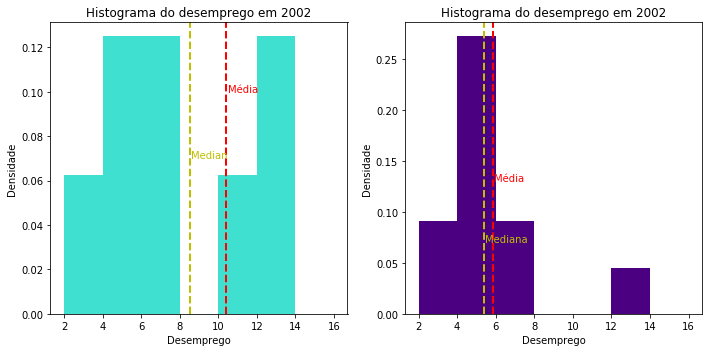

In [702]:
fig=plt.figure(figsize=(10,5))
plt.subplot(121)
plot=analiseUE[2002].plot.hist(color='turquoise',bins=faixa, density=True)
plt.xlabel('Desemprego')
plt.ylabel('Densidade')
plt.title(('Histograma do desemprego em 2002'))
verticalLine(plot, analiseUE[2002].mean(), .1, "r", "Média")
verticalLine(plot, analiseUE[2002].median(), .07, "Y", "Median")


plt.subplot(122)
plot2=analiseOutros[2002].plot.hist(color=('indigo'),bins=faixa, density=True)
plt.xlabel('Desemprego')
plt.ylabel('Densidade')
plt.title(('Histograma do desemprego em 2002'))
verticalLine(plot2, analiseOutros[2002].mean(), .13, "r", "Média")
verticalLine(plot2, analiseOutros[2002].median(), .07, "y", "Mediana")

plt.tight_layout()
plt.show()
    

No período de dois anos, houve uma pequena queda na média dos países estudados da União Europeia (agora 10.4). O que mais chama a atenção é a alteração da mediana, sendo que agora o gráfico apresenta uma pequena assimetria direita. Isso indica que há mais países com um valor de desemprego menor e alguns com esse índice muito alto, sendo que esses últimos aumentam a média. Nota-se, portanto, que nesse período o índice de desemprego decresceu, de maneira geral

Nos países comparáveis, percebe-se que a concentração de países na faixa entre 4 e 6 tornou-se maior. Os valores da média ou da mediana não se alteraram de forma significativa. Contudo, esses índices se aproximaram, fazendo com que o histograma possua uma maior simetria.

### Desemprego em 2004

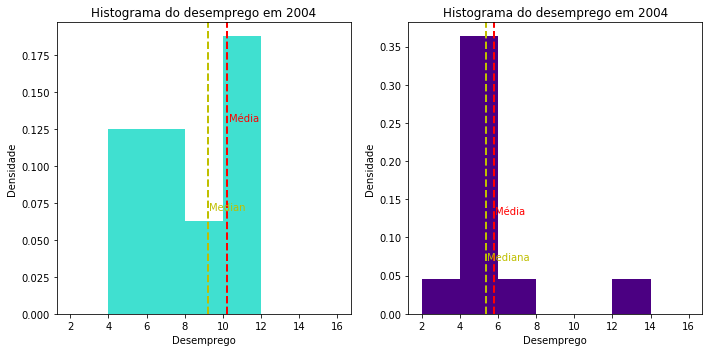

In [696]:
fig=plt.figure(figsize=(10,5))

plt.subplot(121)
plot=analiseUE[2004].plot.hist(color='turquoise',bins=faixa, density=True)
plt.xlabel('Desemprego')
plt.ylabel('Densidade')
plt.title(('Histograma do desemprego em 2004'))
verticalLine(plot, analiseUE[2004].mean(), .13, "r", "Média")
verticalLine(plot, analiseUE[2004].median(), .07, "Y", "Median")



plt.subplot(122)
plot2=analiseOutros[2004].plot.hist(color=('indigo'),bins=faixa, density=True)
plt.xlabel('Desemprego')
plt.ylabel('Densidade')
plt.title(('Histograma do desemprego em 2004'))
verticalLine(plot2, analiseOutros[2004].mean(), .13, "r", "Média")
verticalLine(plot2, analiseOutros[2004].median(), .07, "y", "Mediana")



plt.tight_layout()
plt.show()
    

Para os países europeus, não houve grande alteração na média no ano de 2004 em comparação com o período anterior (agora é 10.2). A mediana aumentou minimamente seu valor, o que indica que o nível de desemprego subiu em alguns países. A moda encontra-se na faixa entre 10 e 12.

Nos países comparáveis, a concentração desse índice na faixa entre 4 e 6 subiu ainda mais. A simetria se manteve, por conta da muito pequena variação da média e mediana.

### Desemprego em 2006

In [883]:
analiseOutros.mean()

EU         0.000000
selecao    2.000000
2000       5.257273
2002       5.868182
2004       5.795455
2006       5.091818
2008       4.560000
dtype: float64

In [884]:
analiseOutros.median()

EU         0.00
selecao    2.00
2000       4.57
2002       5.40
2004       5.39
2006       4.48
2008       4.17
dtype: float64

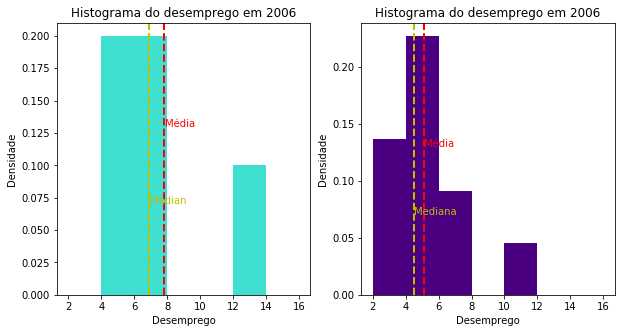

In [697]:
fig=plt.figure(figsize=(10,5))
plt.subplot(121)
plot=analiseUE[2006].plot.hist(color='turquoise',bins=faixa, density=True)
plt.xlabel('Desemprego')
plt.ylabel('Densidade')
plt.title(('Histograma do desemprego em 2006'))
verticalLine(plot, analiseUE[2006].mean(), .13, "r", "Média")
verticalLine(plot, analiseUE[2006].median(), .07, "Y", "Median")


plt.subplot(122)
plot2=analiseOutros[2006].plot.hist(color=('indigo'),bins=faixa, density=True)
plt.xlabel('Desemprego')
plt.ylabel('Densidade')
plt.title(('Histograma do desemprego em 2006'))
verticalLine(plot2, analiseOutros[2006].mean(), .13, "r", "Média")
verticalLine(plot2, analiseOutros[2006].median(), .07, "y", "Mediana")



Nesse período, fica evidente um decrescimento significativo da média (7.7) e da mediana (6.9) nos países europeus. Além disso, a maior parte desses países possui um índice de desemprego na faixa de 4 a 8. Essa é uma alteração grande se comparada à concenntração em um período anterior, que era de 10 a 12. A pequena assimetria direita se manteve, indicando um maior número de países com o índice mais baixo.

Nos países de fora do bloco, houve uma pequena diminuição na média, assim como na mediana. Contudo, a maior parte dos países  continua concentrada na faixa entre 4 e 6.

### Desemprego em 2008

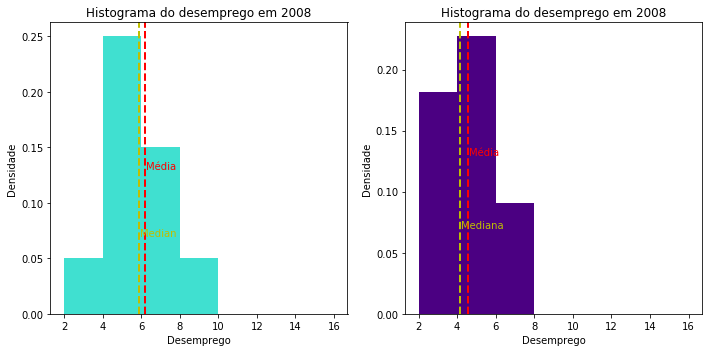

In [698]:
fig=plt.figure(figsize=(10,5))
plt.subplot(121)
plot=analiseUE[2008].plot.hist(color='turquoise',bins=faixa, density=True)
plt.xlabel('Desemprego')
plt.ylabel('Densidade')
plt.title(('Histograma do desemprego em 2008'))
verticalLine(plot, analiseUE[2008].mean(), .13, "r", "Média")
verticalLine(plot, analiseUE[2008].median(), .07, "Y", "Median")


plt.subplot(122)
plot2=analiseOutros[2008].plot.hist(color=('indigo'),bins=faixa, density=True)
plt.xlabel('Desemprego')
plt.ylabel('Densidade')
plt.title(('Histograma do desemprego em 2008'))
verticalLine(plot2, analiseOutros[2008].mean(), .13, "r", "Média")
verticalLine(plot2, analiseOutros[2008].median(), .07, "y", "Mediana")


plt.tight_layout()
plt.show()
    

O histograma dos países que aderiram ao bloco estudado apresenta simetria na distribuição dos dados, já que a média está muito próxima da mediana. Além disso, nota-se que a moda situa-se na faixa entre 4 e 6, ou seja, uma maior quantidade de países encontra-se nessa faixa. Comparado ao histograma de 2000, o valor da média caiu quase que pela metade, sendo igual a 6.2 em 2008.

Nos histogramas montados, a média dos valores está muito próxima da mediana na maioria dos casos. Isso indica que a média é de fato um bom índice nesse caso a ser considerado para a evolução temporal em questão.
Além disso, os histogramas deixam claro que o índice de desemprego teve um decrescimento no período estudado. Ao longo dos anos, a moda (concentração) se moveu para a esquerda, indicando mais países com valores menores desse índice nos histogramas referentes aos países que entraram na União Europeia em 2004.
Em contrapartida, tal mudança não ocorre de maneira tão significativa nos países comparáveis.

Para a obtenção de uma perspectiva geral, foi plotada a média do desemprego ao longo do tempo para os países que entraram na União Europeia em 2004, os que já faziam parte do bloco e aqueles escolhidos para a comparação

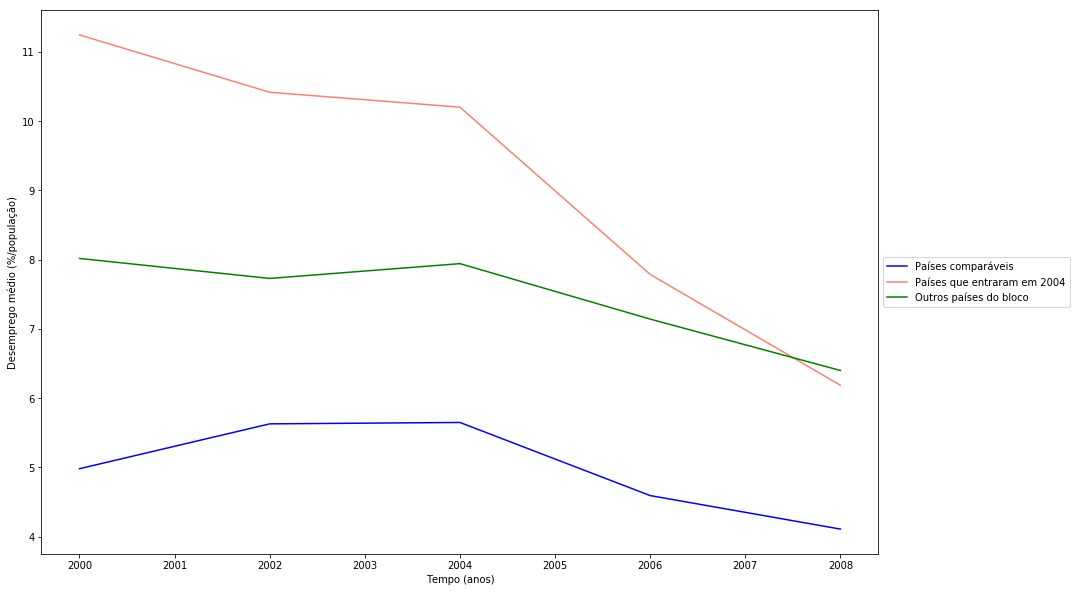

In [718]:
mediaEU = analiseUE.loc[:,[(2000),(2002),(2004),(2006),(2008)]].mean()
index = y.index

mediaOutrosEU = outrosEU.loc[:,[(2000),(2002),(2004),(2006),(2008)]].mean()

mediaOutros = analiseOutros.loc[:,[(2000),(2002),(2004),(2006),(2008)]].mean()

plt.figure(figsize=(15,10))
plt.plot(x,mediaOutros, color=('blue'),label='Países comparáveis')
plt.plot(x,mediaEU, color=('salmon'), label='Países que entraram em 2004')
plt.plot(x,mediaOutrosEU, color=('green'), label='Outros países do bloco')
plt.xlabel('Tempo (anos)')
plt.ylabel('Desemprego médio (%/população)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Percebe-se no gráfico que, levando em conta apenas as médias, o desemprego caiu de modo significativo, principalmente a partir de 2004, nos países que entraram no bloco neste ano. Paralelamente, os países comparáveis, apesar de possuirem em média um menor índice de desemprego, tiveram menor variação no indicador. Vale ressaltar também que a média dessa variável é mais alta na União Europeia, em relação aos países comparáveis.

## Análise bidimensional dos motivos

Na análise do desemprego, ficou claro que esse índice sofreu alterações ao longo dos anos. Em um período de apenas quatro anos, após 2004, o desemprego diminuiu em países que aderiram à União Europeia de modo significativo.

Na seguinte parte da análise, serão investigados os possíveis motivos para essa diminuição. Será efetuado o estudo do índice de investimento interno, índice de exportação e crescimento anual do GDP.

O objetivo é analisar a relação do desemprego com as características econômicas e estruturais escolhidas. 

### Ano de 2013

A relação entre os diferentes índices não depende da entrada dos países no bloco, sendo idealmente atemporal. O ano de 2013 foi escolhido por ser o mais recente que continha dados de todos dos dataframes.

In [859]:
idh = pd.read_excel('idh.xlsx')
gdp= pd.read_excel('gdp_capta.xlsx')
unemployment=pd.read_excel('unemployment.xlsx')
investimento=pd.read_excel('inestimentos.xlsx')
dGDP=pd.read_excel('aumento_GDP.xlsx')
exportacao=pd.read_excel('exportacao.xlsx')

idh=idh.set_index('country')
gdp=gdp.set_index('country')
unemployment=unemployment.set_index('country')
investimento=investimento.set_index('country')
dGDP=dGDP.set_index('country')
exportacao=exportacao.set_index('country')


invest = investimento.loc[:,[(2013)]]
invest = invest.rename(columns = {2013:'Investimento_2013'})
crescimento_gdp = dGDP.loc[:,[(2013)]]
crescimento_gdp = crescimento_gdp.rename(columns = {2013:'CrescimentoGDP_2013'})
export = exportacao.loc[:,[(2013)]]
export = export.rename(columns = {2013:'Exportacao_2013'})
unemployment=unemployment.loc[:,[(2013)]]
unemployment = unemployment.rename(columns = {2013:'Desemprego_2013'})
df=paises.join(invest, lsuffix='', rsuffix='')
df=df.join(export, lsuffix='', rsuffix='')
df=df.join(crescimento_gdp, lsuffix='', rsuffix='')
df=df.join(unemployment, lsuffix='', rsuffix='')
data=df[(df['EU']==1)]
data.head(3)

,EU,selecao,Investimento_2013,Exportacao_2013,CrescimentoGDP_2013,Desemprego_2013
country,,,,,,
Austria,1,0,23.7,53.4,0.2770,5.33
Belgium,1,0,22.2,81.7,-0.0943,8.43
Bulgaria,1,0,21.3,64.7,0.8060,12.90


### Relação entre exportação e desemprego na União Europeia em 2013

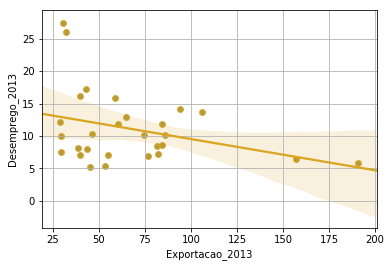

In [860]:
data.plot.scatter(x='Exportacao_2013',y='Desemprego_2013');
sns.regplot(data["Exportacao_2013"],data["Desemprego_2013"], color=('goldenrod'))
plt.grid()

In [861]:
print('A correlação é:', data['Desemprego_2013'].corr(data['Exportacao_2013']))

A correlação é: -0.32917164616169586


O valor r=-0.3291 de correlação entre o desemprego em 2013 e a exportação em 2013 indica uma assosiação negativa baixa entre os indicadores. Isto pode ser observado no gráfico de dispersão. 


### Relação entre investimento interno e desemprego na União Europeia em 2013

A correlação é: -0.5415420162054064


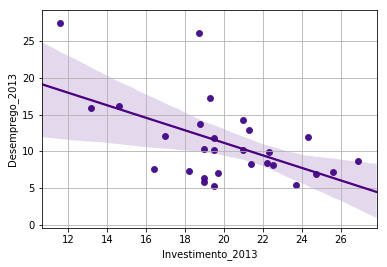

In [862]:
data.plot.scatter(x='Investimento_2013',y='Desemprego_2013');
sns.regplot(data["Investimento_2013"],data["Desemprego_2013"], color=('indigo'))
plt.grid()

print('A correlação é:', data['Desemprego_2013'].corr(data['Investimento_2013']))

O valor r=-0.54154 de correlação entre o desemprego em 2013 e o investimento interno em 2013 indica uma assosiação negativa moderada entre os indicadores. Isto pode ser observado no gráfico de dispersão. 


### Relação entre crescimento do GDP e desemprego na União Europeia em 2013

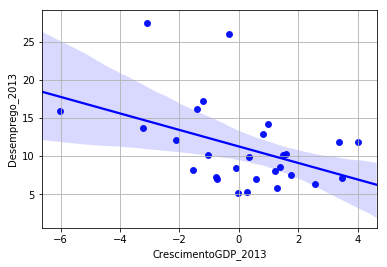

In [863]:
data.plot.scatter(x='CrescimentoGDP_2013',y='Desemprego_2013');
sns.regplot(data["CrescimentoGDP_2013"],data["Desemprego_2013"], color=('blue'))
plt.grid()

In [864]:
print('A correlação é:', data['CrescimentoGDP_2013'].corr(data['Desemprego_2013']))

A correlação é: -0.42796545003575487


O valor r=-0.-0.4279 de correlação entre o desemprego em 2013 e o investimento interno em 2013 indica uma assosiação negativa moderada entre os indicadores. Isto pode ser observado no gráfico de dispersão. 


Os índices que mais se relacionam com o desemprego no ano de 2013 são o crescimento do GDP e o nível de investimento interno. O gráfico de dispersão a seguir indica a relação entre essas duas variáveis.

### Relação entre crescimento do GDP e investimento interno na União Europeia em 2013

A correlação é: 0.5922171009407797


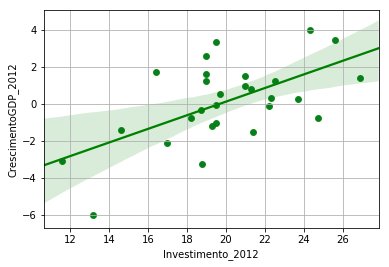

In [789]:

data.plot.scatter(x='Investimento_2013',y='CrescimentoGDP_2013');
sns.regplot(data["Investimento_2013"],data["CrescimentoGDP_2013"], color=('green'))
plt.grid()

print('A correlação é:', data['CrescimentoGDP_2013'].corr(data['Investimento_2013']))

A correlação de r=0.5922 indica uma relação moderada para alta entre esses índices. Ou seja, quanto mais cresce o GDP, maior é o investimento em infraestrutura interna no país. Esse resultado é coerente, pois a medida que o GDP aumenta, o capital circulante dentro do país fica maior. Com mais capital disponível, é esperado que os recursos sejam aplicados, o que explica o aumento no investimento interno.

## Ano de 2009

Para corroborar a análise, optou-se por escolher mais um ano para estudar a relação entre os índices. Este foi o ano de 2009.

In [868]:
data.head()

,EU,selecao,Investimento_2009,Exportacao_2009,CrescimentoGDP_2009,Desemprego_2009
country,,,,,,
Austria,1,0,22.8,45.2,-3.77,5.30
Belgium,1,0,21.7,69.3,-3.02,7.91
Bulgaria,1,0,28.6,42.3,-5.55,6.82
Croatia,1,0,25.0,34.5,-7.00,9.20
Cyprus,1,1,22.9,48.7,-3.32,5.36


In [885]:
idh = pd.read_excel('idh.xlsx')
gdp= pd.read_excel('gdp_capta.xlsx')
unemployment=pd.read_excel('unemployment.xlsx')
investimento=pd.read_excel('inestimentos.xlsx')
dGDP=pd.read_excel('aumento_GDP.xlsx')
exportacao=pd.read_excel('exportacao.xlsx')

idh=idh.set_index('country')
gdp=gdp.set_index('country')
unemployment=unemployment.set_index('country')
investimento=investimento.set_index('country')
dGDP=dGDP.set_index('country')
exportacao=exportacao.set_index('country')

ano=2009


invest = investimento.loc[:,[(ano)]]
invest = invest.rename(columns = {ano:'Investimento_2009'})
crescimento_gdp = dGDP.loc[:,[(ano)]]
crescimento_gdp = crescimento_gdp.rename(columns = {ano:'CrescimentoGDP_2009'})
export = exportacao.loc[:,[(ano)]]
export = export.rename(columns = {ano:'Exportacao_2009'})
unemployment=unemployment.loc[:,[(ano)]]
unemployment = unemployment.rename(columns = {ano:'Desemprego_2009'})
df=paises.join(invest, lsuffix='', rsuffix='')
df=df.join(export, lsuffix='', rsuffix='')
df=df.join(crescimento_gdp, lsuffix='', rsuffix='')
df=df.join(unemployment, lsuffix='', rsuffix='')
data=df[(df['EU']==1)]


### Relação entre exportação e desemprego na União Europeia em 2009

C:\Users\gabic\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


A correlação é: -0.18652988537590423


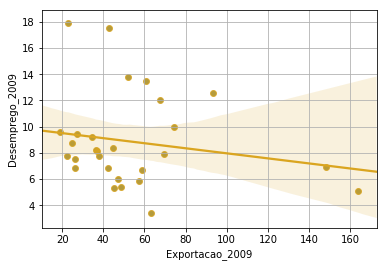

In [870]:
data.plot.scatter(x='Exportacao_2009',y='Desemprego_2009');
sns.regplot(data["Exportacao_2009"],data["Desemprego_2009"], color=('goldenrod'))
plt.grid()
print('A correlação é:', data['Desemprego_2009'].corr(data['Exportacao_2009']))

A correlação (r=-0.1865) entre os índices de desemprego e de exportação é pequena, o que demonstra uma relação baixa entre essas duas variáveis

### Relação entre investimento interno e desemprego na União Europeia em 2009

A correlação é: -0.0859480867502636


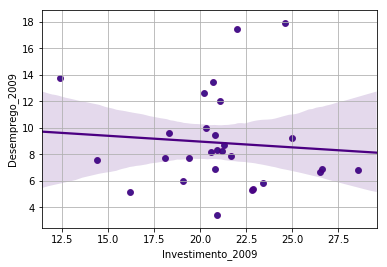

In [871]:
data.plot.scatter(x='Investimento_2009',y='Desemprego_2009');
sns.regplot(data["Investimento_2009"],data["Desemprego_2009"], color=('indigo'))
plt.grid()

print('A correlação é:', data['Desemprego_2009'].corr(data['Investimento_2009']))

No ano de 2009, a relação entre o desemprego e o índice de investimento interno foi baixa (correlação de r=-0.08594)
Entretanto, deve-se considerar que este foi o ano de início da crise da União Europeia. Ambos indicadores podem ser considerados reflexos da situação econômica do país, pois dependem do capital interno circulante. É de se esperar que o investimento interno dos países tenha uma diminuição, que seria notável a curto prazo. 
O índice de desemprego, porém, levaria um pouco mais de tempo para se alterar,  já que o esperado é que seu aumento significativo se dê em uma situação de crise mais agravada.

### Relação entre crescimento do GDP e desemprego na União Europeia em 2013

A correlação é: -0.5157342603866402


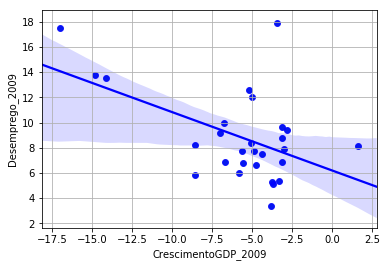

In [872]:
data.plot.scatter(x='CrescimentoGDP_2009',y='Desemprego_2009');
sns.regplot(data["CrescimentoGDP_2009"],data["Desemprego_2009"], color=('blue'))
plt.grid()
print('A correlação é:', data['CrescimentoGDP_2009'].corr(data['Desemprego_2009']))


O valor da correlação indica uma associação moderada entre os indicadores (r=-0.5157). Contudo, nota-se que dois países podem ser considerados outliners, por terem níveis de desemprego muito altos, estando muito distantes da média 
Por isso, optou-se por retirar esses países da análise.

A correlação é: -0.6756507023981041


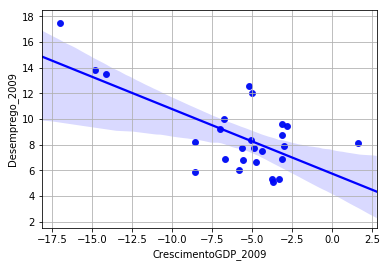

In [877]:
data=data.drop('Netherlands')
data=data.drop('Spain')

data.plot.scatter(x='CrescimentoGDP_2009',y='Desemprego_2009');
sns.regplot(data["CrescimentoGDP_2009"],data["Desemprego_2009"], color=('blue'))
plt.grid()
print('A correlação é:', data['CrescimentoGDP_2009'].corr(data['Desemprego_2009']))


O novo resultado indica uma correlação negativa de grande módulo entre o crescimento do GDP e o nível de desemprego.

Isso demonstra que quanto maior o crescimento econômico de um país, menor será o desemprego nele. Essa correspondência é condizente, pois quando um país cresce mais economicamente, é esperado que a produção de bens e serviços seja maior, promovendo mais postos de trabalho.

## Conclusão

A análise temporal, especialmente, os histogramas e o gráfico das médias ao longo do tempo, mostrou que o desemprego diminuiu nós países que aderiram à União Europeia

Ao contrário do que se pensava, alguns motivos indicados no artigo para a prosperidade econômica do bloco, mais especificamente exportações e investimentos internos,  não se mostraram fatores determinantes para o nível de desemprego.

O índice de exportações, em especial, mostrou possuir pequena relação. Uma possível justificativa é que uma boa parte da produção pode ser voltada ao mercado interno. Ou seja, os postos de trabalho vinculados a essa produção não teriam ligação com a exportação. Além disso, é importante considerar que em um mundo globalizado, pós terceira revolução industrial, grande parte dos empregos está atrelada a serviços, que também não afeta as exportações.

O índice de investimentos internos apresentou uma relação moderada a baixa. É esperado que com mais investimentos em infraestrutura, surjam mais postos de trabalho para manutenção, construção, administração e etc.
Porém,  é importante levar em conta que muitos empregos provém do setor terciário ou iniciativas privadas, não tendo uma ligação direta com os investimentos internos do país.

O indicador que teve uma relação moderada a alta foi o crescimento do GDP. Isso é compreensível, já que quando a economia está em superávit, a tendência é que os setores econômicos produtivos de expandam, consequentemente gerando mais empregos

A União Europeia é considerado um bloco econômico poderoso, que possui um grande impacto na economia dos países membros, como comprovado no artigo citado na introdução do trabalho

Fica evidente, levando em conta os dados analisados, que o pertencimento ao bloco econômico afeta de modo positivo a economia do país e ocasiona a diminuição do índice de desemprego